In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings("ignore")

In [84]:
df = pd.read_csv(r"C:\Users\RAHUL BABU KOPPULA\OneDrive\Desktop\Oasis_ infobyte_internship\datasets\car data.csv")

In [85]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [86]:
print(df.shape)
print(df.columns)
df.head()

(301, 9)
Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [87]:
print(df.describe())

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [88]:
df.rename(columns={'Selling_Price': 'price', 'Year': 'year', 'Driven_kms': 'mileage'}, inplace=True)

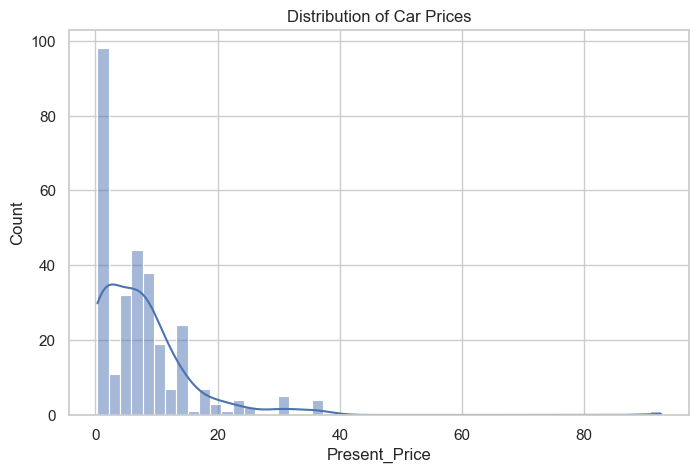

In [89]:
plt.figure(figsize=(8,5))
sns.histplot(df['Present_Price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.show()

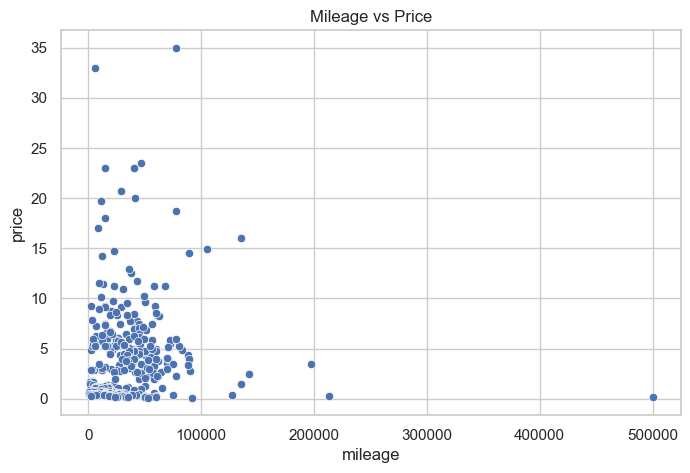

In [90]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='mileage', y='price', data=df)
plt.title('Mileage vs Price')
plt.show()

In [91]:
print(df.isnull().sum())


Car_Name         0
year             0
price            0
Present_Price    0
mileage          0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [92]:
current_year = datetime.datetime.now().year
df['car_age'] = current_year - df['year']

In [93]:
cat_cols = ['Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [95]:
scaler = StandardScaler()
df['mileage_scaled'] = scaler.fit_transform(df[['mileage']])
df['present_price_scaled'] = scaler.fit_transform(df[['Present_Price']])
scaler

StandardScaler()

In [96]:
features = ['mileage_scaled', 'present_price_scaled', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'car_age']
target = 'price'

X = df[features]
y = df[target]
X
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: price, Length: 301, dtype: float64

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [77]:
y_pred = model.predict(X_test)
y_pred

array([ 0.444 , 10.9116,  4.9095,  0.2184,  7.8365,  6.2115,  1.0915,
        0.5887,  0.4679,  6.8895,  7.9495,  1.0879,  8.3203,  0.4543,
        5.301 ,  2.6215,  1.1605, 14.4043,  0.4657,  1.551 ,  0.3267,
        8.1192,  4.7405,  2.7465,  0.504 ,  3.494 ,  5.416 ,  3.185 ,
        1.1619,  1.1704,  0.4136, 10.1715,  0.4528,  2.5814,  7.9039,
        4.1365,  6.6525,  6.3938,  2.5065,  7.1684,  4.1448,  3.6602,
        4.867 ,  0.5623,  6.1   ,  0.7355,  8.4295,  7.303 ,  2.899 ,
        3.63  ,  4.99  ,  1.5006, 22.8342, 20.7394,  6.4375, 10.9513,
        5.139 ,  9.2675,  2.6884,  6.7275,  0.2302])

In [78]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.9826195520639511

In [79]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.6459852459016392

In [80]:
r2 = r2_score(y_test, y_pred)
r2

0.9580847977507195

In [71]:
print(f"Random Forest Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

Random Forest Model Performance:
RMSE: 0.98
MAE: 0.65
R2 Score: 0.96


In [72]:
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)
print("\nFeature Importance:\n", feat_importance)


Feature Importance:
 present_price_scaled    0.883649
car_age                 0.059788
mileage_scaled          0.034586
Transmission            0.011966
Fuel_Type               0.006456
Selling_type            0.003491
Owner                   0.000063
dtype: float64


In [73]:
import joblib
joblib.dump(model, 'car_price_rf_model.pkl')

['car_price_rf_model.pkl']

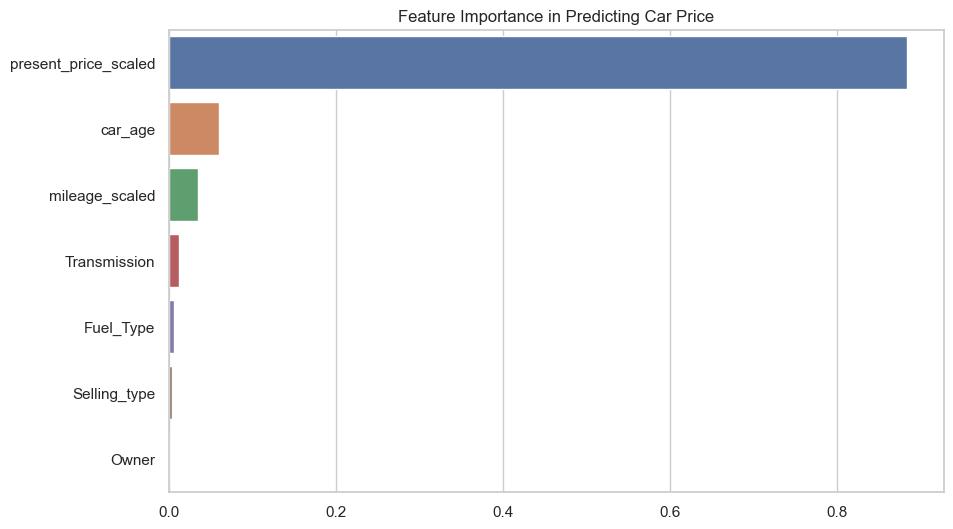

In [74]:
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance.values, y=feat_importance.index)
plt.title("Feature Importance in Predicting Car Price")
plt.show()